In [ ]:
# default_exp backwards
# hide
from nbdev.showdoc import *
%load_ext autoreload
%autoreload 2

# Create source

In [ ]:
from directed_graphs.datasets import sink_graph, source_graph
dataset = source_graph(n_points = 700)
data = dataset[0]

In [ ]:
# save the graph
import torch
import os

folder = "trees"
file = "source.pt"

if folder not in os.listdir():
    os.makedirs(folder)

torch.save(data, f"{folder}/{file}")

## Load presaved data

In [ ]:
# load presaved data
import torch
data = torch.load("trees/source.pt")

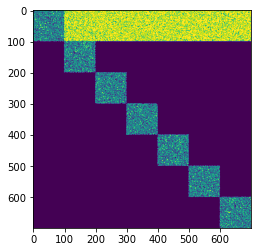

In [ ]:
from directed_graphs.datasets import visualize_heatmap
visualize_heatmap(data.edge_index)

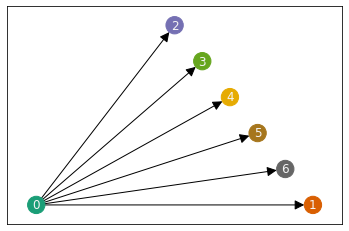

In [ ]:
from directed_graphs.datasets import visualize_edge_index
visualize_edge_index(data, num_clusters=7)

# Apply Backward node2vec on source

In [ ]:
from directed_graphs.backwards import BackwardsNode2Vec
from torch_geometric.utils import to_networkx

G_nx = to_networkx(data, to_undirected=False)
node2vec2_model = BackwardsNode2Vec(G_nx, backward_prob=0.0, p=1, q=1, dimensions=64, walk_length=30, num_walks=200, workers=4)
emb = node2vec2_model.get_embeddings(window=10)
emb.shape

Computing transition probabilities:   0%|          | 0/700 [00:00<?, ?it/s]

backward_prob = 0.0, dimension = 64, walk_length = 30, num_walks = 200, window = 10


(700, 64)

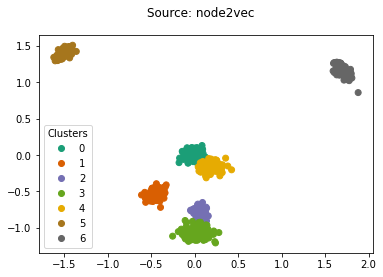

In [ ]:
from directed_graphs.datasets import plot_embeddings
plot_embeddings(emb, num_nodes=700, num_clusters=7, title="Source: node2vec")

# Same source with regular node2vec

In [ ]:
G_nx = to_networkx(data, to_undirected=False)
node2vec2_model = BackwardsNode2Vec(G_nx, backward_prob=0.1, p=1, q=1, dimensions=64, walk_length=30, num_walks=200, workers=4)
emb = node2vec2_model.get_embeddings(window=10)
emb.shape

Computing transition probabilities:   0%|          | 0/700 [00:00<?, ?it/s]

backward_prob = 0.1, dimension = 64, walk_length = 30, num_walks = 200, window = 10


(700, 64)

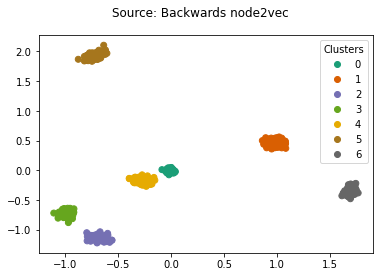

In [ ]:
plot_embeddings(emb, num_nodes=700, num_clusters=7, title="Source: Backwards node2vec")

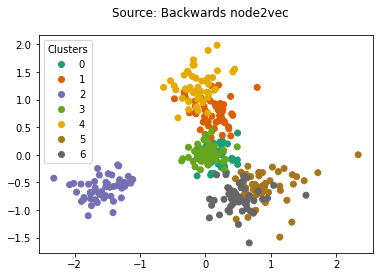

In [ ]:
plot_embeddings(emb, num_nodes=700, num_clusters=7, title="Source: Backwards node2vec")

In [ ]:
from directed_graphs.backwards import plot_multiple_embeddings
backward_prob_lst = [0.0, 0.1]
dimensions_lst = [32, 64]
walk_length_lst = [25, 30, 35]
p_lst = [1]
q_lst = [1]
num_walk = 200
num_repeat = 5
plot_multiple_embeddings(data, num_clusters=7, backward_prob_lst=backward_prob_lst, dimensions_lst=dimensions_lst, walk_length_lst=walk_length_lst, p_lst=p_lst, q_lst=q_lst, num_walk=num_walk, num_repeat=num_repeat)

  0%|          | 0/12 [00:00<?, ?it/s]